***
Importowanie bibliotek
***

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from matplotlib import pyplot as plt
%matplotlib inline


Inicjowanie wykresu


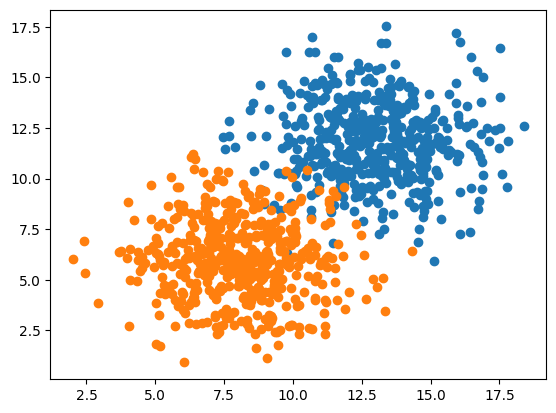

In [2]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

***
Tworzenie i trenowanie modelu
***

In [3]:
model = Sequential()
model.add(Dense(units=1, input_shape= (2,), activation='sigmoid'))
adam = Adam(0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs= 500, shuffle='true')

Epoch 1/500
20/20 [==============================] - 0s 790us/step - loss: 1.1770 - accuracy: 0.5050
Epoch 2/500
20/20 [==============================] - 0s 787us/step - loss: 0.4350 - accuracy: 0.8170
Epoch 3/500
20/20 [==============================] - 0s 737us/step - loss: 0.3442 - accuracy: 0.8710
Epoch 4/500
20/20 [==============================] - 0s 685us/step - loss: 0.2834 - accuracy: 0.9330
Epoch 5/500
20/20 [==============================] - 0s 685us/step - loss: 0.2512 - accuracy: 0.9420
Epoch 6/500
20/20 [==============================] - 0s 737us/step - loss: 0.2230 - accuracy: 0.9580
Epoch 7/500
20/20 [==============================] - 0s 739us/step - loss: 0.1975 - accuracy: 0.9600
Epoch 8/500
20/20 [==============================] - 0s 728us/step - loss: 0.1905 - accuracy: 0.9560
Epoch 9/500
20/20 [==============================] - 0s 738us/step - loss: 0.1869 - accuracy: 0.9590
Epoch 10/500
20/20 [==============================] - 0s 738us/step - loss: 0.1608 - accura

Wykresy błedu - `loss` i precyzji - `accuracy`

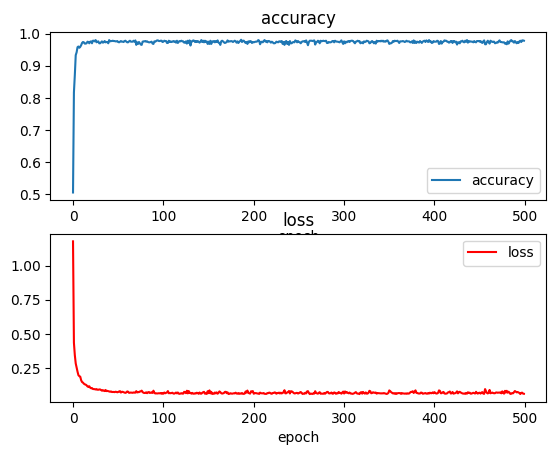

In [4]:

plt.subplot(2,1,1)
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.subplot(2,1,2)
plt.plot(h.history['loss'], color='r')
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])
plt.show()

***
Rysowanie naszego modelu na wykresie
***
Funkcje :

In [14]:
def plot_decision_boundary(X,y, model):
    x_span = np.linspace(min(X[:,0])-1, max(X[:,0])+1)
    y_span = np.linspace(min(X[:,1])-1, max(X[:,1])+1) #tworzenie przestrzeni naszego wykresu w OSI X i Y
    xx, yy = np.meshgrid(x_span, y_span) #tworzy macierz o rozmiarze wektora n , macierz nxn gdzie jedna kolumna badz wiersz maja takie same wartosci
    # print(xx,'\n',yy)
    xx_, yy_ = xx.ravel(), yy.ravel() # ravel robi z macierzy wektor jednowymiarowy
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

79/79 [==============================] - 0s 648us/step


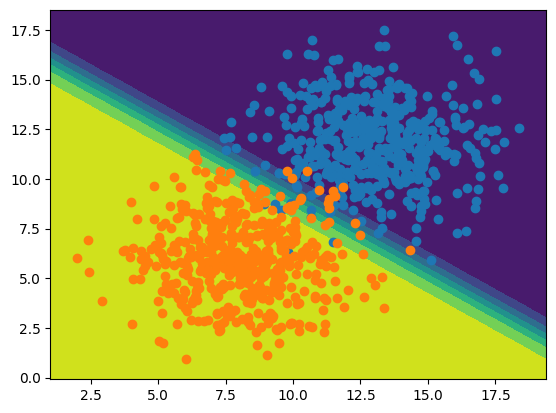

In [15]:
plot_decision_boundary(X,y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

1/1 [==============================] - 0s 14ms/step
prediction is:  [[0.6791758]]


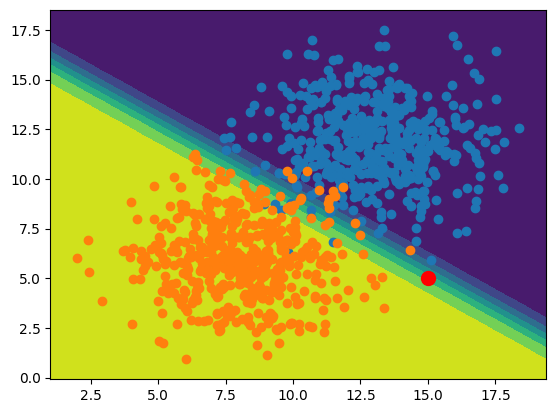

In [23]:
plot_decision_boundary(X,y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 15
y = 5
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker="o", markersize=10, color="r")
print("prediction is: ", prediction)